# Fatal Police Shootings in the U.S. 2015-2017

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import geopandas as gpd
import folium
from branca.colormap import LinearColormap

warnings.filterwarnings('ignore')

# 1. Introduction to the data.

The dataset contains information on incidents of police shootings, encompassing various attributes such as demographics, incident details, and geographical information.

In [10]:
data = pd.read_csv('shootings.csv')
data.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## 1.1 Key Features

1. **Demographics**:
   - *Age:* Range of ages for individuals involved in the incidents.
   - *Gender:* Indicates male and female individuals.
   - *Race:* Indicates distribution based on race/ethnicity.

2. **Incident Details**:
   - *Date:* Timestamps of when the incidents occurred.
   - *Manner of Death:* Description of how the death occurred (e.g., shot, shot and Tasered).
   - *Armed:* Type of armament involved (e.g., gun, knife, unarmed).
   - *Signs of Mental Illness:* Indication of whether the individual showed signs of mental illness.
   - *Threat Level:* Level of threat perceived during the incident.
   - *Flee:* Description of whether the individual was fleeing the scene.

3. **Geographical Information**:
   - *City:* Locations where the incidents took place.
   - *State:* State-wise distribution of incidents.
   - *Latitude and Longitude:* Geospatial coordinates of the incidents.


## 1.2 Aim of the Project

The primary goal of this project is to comprehensively analyze the shootings dataset, aiming to get insights and patterns from the recorded incidents. 

Understanding the distribution of incidents across various states is a focal point, seeking to identify states with higher occurrence rates or dominance in these incidents. A crucial aspect of this analysis involves data cleaning procedures to ensure the reliability of the subsequent insights.

The primary objectives investigating potential associations between the variable 'race' and other key factors such as 'age' and 'armed'. This exploration aims to show whether there's a relationship between race and these variables.

Additionally, this project focuses to explore a vast majority of variables within the dataset to gain a comprehensive understanding of the available information.


## 1.3 Basic Statistics About the Data

The dataset consists of 2142 records and 14 columns. Among these columns, 'id' and 'age' are the only numerical features. It's important to note the presence of missing values in some columns, indicating potential data gaps that require attention in the subsequent analysis.

The 'id' column likely represents a unique identifier for each incident, while 'age' denotes the age of the individuals involved. Exploring the distribution of ages might offer insights into the demographics of these incidents.

Other columns in the dataset might contain categorical or textual information, such as 'name', 'date', 'manner_of_death', 'armed', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', and 'body_camera'. These columns are likely to provide context and descriptive details about each incident.

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2142 non-null   int64  
 1   name                     2123 non-null   object 
 2   date                     2142 non-null   object 
 3   manner_of_death          2142 non-null   object 
 4   armed                    2136 non-null   object 
 5   age                      2099 non-null   float64
 6   gender                   2141 non-null   object 
 7   race                     2039 non-null   object 
 8   city                     2142 non-null   object 
 9   state                    2142 non-null   object 
 10  signs_of_mental_illness  2142 non-null   bool   
 11  threat_level             2142 non-null   object 
 12  flee                     2106 non-null   object 
 13  body_camera              2142 non-null   bool   
dtypes: bool(2), float64(1), 

# 2. Data cleaning

This section aims to uncover various insights about the dataset:

- **Identification of Missing Values:** Are there any missing values present in the dataset?
- **Handling Missing Values:** How should we address and manage these missing values?
- **Detection of Duplicates:** Are there any duplicate entries within the dataset?
- **Exploration of Notable Patterns:** Are there any other significant observations or patterns to note?

In the previous section, we examined the data types of columns within our dataset. Notably, while there exists a 'date' column, it lacks the appropriate date data type. We'll proceed to rectify this by creating one:

In [12]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

We can see that 'date' column now is in datetime64 data type.

In [13]:
print(data['date'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 2142 entries, 0 to 2141
Series name: date
Non-Null Count  Dtype         
--------------  -----         
2142 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 16.9 KB
None


Our dataset spans from the first days of 2015 to the first months of 2017, encompassing the recorded incidents during this period.

In [14]:
print(data.date.min())
print(data.date.max())

2015-01-02 00:00:00
2017-02-28 00:00:00


## 2.1 Checking for duplicates

To search for duplicated values firstly we need to remove first column from the data as the column is unique for each row. Also, we will not need it for our analysis.

In [15]:
data = data.iloc[:, 1:]


duplicate_rows = data[data.duplicated()]


if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate Rows:
                     name       date manner_of_death armed   age gender race  \
2053  Jamake Cason Thomas 2017-02-03            shot   gun  22.0      M    B   

         city state  signs_of_mental_illness threat_level flee  body_camera  
2053  Rowland    NC                    False       attack  Car        False  


We can see that there are one duplicate. To ensure data integrity and accuracy, the duplicate will be removed from the dataset.

In [16]:
data_no_duplicates = data.drop_duplicates()

print("Shape before removing duplicates:", data.shape)
print("Shape after removing duplicates:", data_no_duplicates.shape)

Shape before removing duplicates: (2142, 13)
Shape after removing duplicates: (2141, 13)


It is evident that we have removed one row from our data.

## 2.2 Checking for missing values

This section aims to offer an overview of missing values present within the dataset.

In [17]:
missing_values = data.isnull().sum()


columns_with_missing_values = missing_values[missing_values > 0]
print("Columns with Missing Values:")
print(columns_with_missing_values)

Columns with Missing Values:
name       19
armed       6
age        43
gender      1
race      103
flee       36
dtype: int64


We can see that there are quite a lot of missing values in six columns - 'name', 'armed', 'age', 'gender', 'race' and 'flee'.

Given that the subsequent sections will analyze the 'race', 'gender', 'armed', 'age', and 'flee' columns, we'll proceed by removing missing values specifically from these columns.

Regarding the 'name' variable, as it holds limited value for our forthcoming analysis, null values within this column will not be removed.

In [18]:
data_no_nulls = data_no_duplicates.dropna(subset=['race', 'armed', 'age', 'flee', 'gender'])

## 2.3 Outliers

Upon the removal of missing values and duplicates, the next step involves investigating the presence of outliers within the dataset. Notably, among the columns, 'age' stands as the only numerical column eligible to outliers, as indicated in the previous description.

In [19]:
data_no_nulls['age'].describe()

count    1985.000000
mean       36.117884
std        12.648880
min         6.000000
25%        26.000000
50%        34.000000
75%        45.000000
max        83.000000
Name: age, dtype: float64

The dataset reveals a broad age range among individuals involved in fatal shootings, with the youngest victim being a 6-year-old child and the oldest a senior of 83 years. This extensive span across ages is not uncommon, reflecting the natural diversity within a population. To visually explore this diversity, a boxplot analysis will be conducted.

Additionally, the dataset's average age of victims stands at approximately 36 years, providing a central tendency within this wide-ranging dataset.

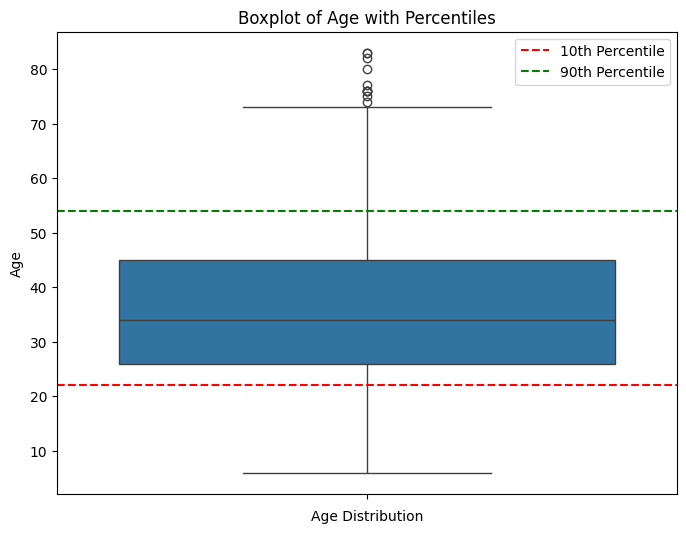

In [20]:
percentiles = data_no_nulls['age'].quantile([0.1, 0.9])


plt.figure(figsize=(8, 6))
sns.boxplot(y='age', data=data_no_nulls, orient='h')
plt.axhline(y=percentiles[0.1], color='r', linestyle='--', label='10th Percentile')
plt.axhline(y=percentiles[0.9], color='g', linestyle='--', label='90th Percentile')
plt.title('Boxplot of Age with Percentiles')
plt.xlabel('Age Distribution')
plt.ylabel('Age')
plt.legend()
plt.show()

There are a few data points that fall outside the calculated percentiles. However, as previously noted, the age range presents typical characteristics. It's possible that an 83-year-old senior was involved in these incidents, contributing to these outliers. Hence, no further outlier analysis will be conducted, and all observations will remain unaltered for continued analysis.

# 3. Exploratory Data Analysis (EDA)

This section dives deeper into the various columns within our dataset.

We will explore the cleaned dataset, excluding duplicates and missing values.

During our analysis, the columns 'id' and 'name' will be excluded for further investigation.


In [21]:
new_data = data_no_nulls.iloc[:, 1:]  
new_data.head(5)

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## 3.1 Descriptive statistics - manner of death

The bar plot below illustrates the 'manner_of_death' column, revealing two distinct categories: 'shot' and 'shot and tasered'. Notably, a significant majority of recorded deaths resulted from shooting incidents, while a smaller proportion involved the use of tasers. This observation raises interesting questions about law enforcement practices in the United States, suggesting a predominant reliance on lethal force over attempts to apprehend suspects using less lethal means.

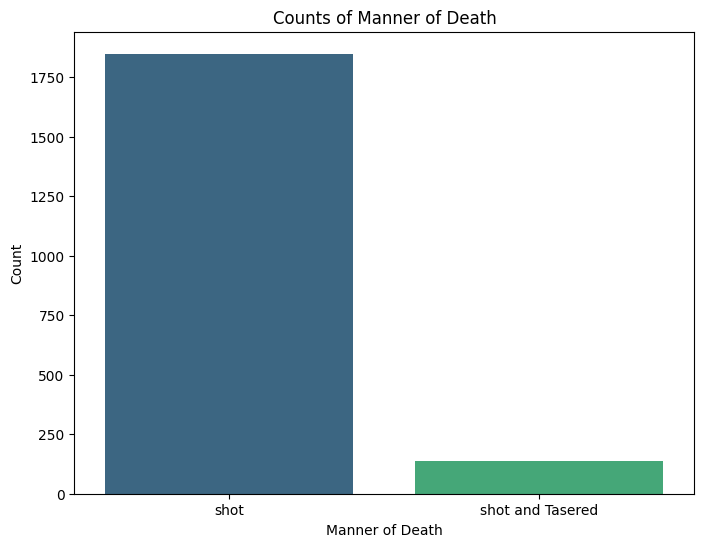

In [22]:
manner_counts = new_data['manner_of_death'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=manner_counts.index, y=manner_counts.values, palette='viridis')
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.title('Counts of Manner of Death')
plt.show()

## 3.2 Descriptive statistics - armed

Before analysing 'armed' variable let's look at unique categories.

In [23]:
num_unique_armed = new_data['armed'].nunique()
print(f"The 'armed' column has {num_unique_armed} unique categories.")

The 'armed' column has 61 unique categories.


In [24]:
unique_armed_categories = new_data['armed'].unique()
print("Unique categories in the 'armed' column:")
for category in unique_armed_categories:
    print(category)

Unique categories in the 'armed' column:
gun
unarmed
toy weapon
nail gun
knife
vehicle
shovel
hammer
hatchet
undetermined
sword
machete
box cutter
metal object
screwdriver
lawn mower blade
flagpole
guns and explosives
cordless drill
metal pole
Taser
metal pipe
metal hand tool
blunt object
metal stick
sharp object
meat cleaver
carjack
chain
contractor's level
unknown weapon
stapler
crossbow
bean-bag gun
baseball bat and fireplace poker
straight edge razor
gun and knife
ax
brick
baseball bat
hand torch
chain saw
garden tool
scissors
pole
pick-axe
flashlight
spear
pitchfork
hatchet and gun
rock
piece of wood
bayonet
glass shard
motorcycle
metal rake
baton
crowbar
oar
machete and gun
beer bottle


Observing the numerous categories within this variable, we aim to simplify the analysis by creating a new column named 'armed_category', consolidating outcomes into two categories: 'armed' and 'unarmed'.

Notably, a significant majority of victims were armed, potentially shedding light on the use of lethal force by law enforcement in situations where suspects were perceived as armed.

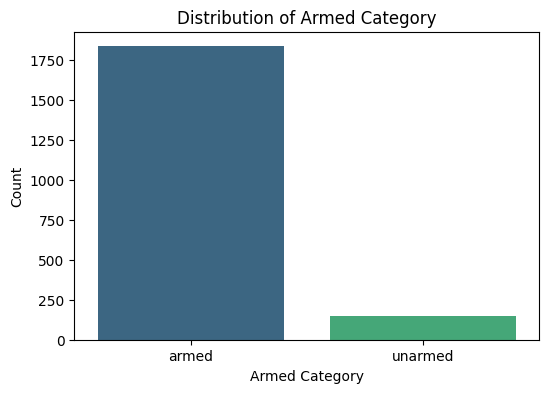

In [29]:
new_data['armed_category'] = new_data['armed'].apply(lambda x: 'unarmed' if x == 'unarmed' else 'armed')

plt.figure(figsize=(6, 4))
sns.countplot(x='armed_category', data=new_data, palette='viridis')
plt.xlabel('Armed Category')
plt.ylabel('Count')
plt.title('Distribution of Armed Category')
plt.show()

Upon plotting the 'manner_of_death' and 'armed_category' columns, one might anticipate observing a pattern where a majority of unarmed victims would also be subjected to tasering. However, the graph does not exhibit this expected trend, preventing us from drawing such a conclusion based on the visual representation. Seems that police is using fatal weapons even though victims were unarmed.

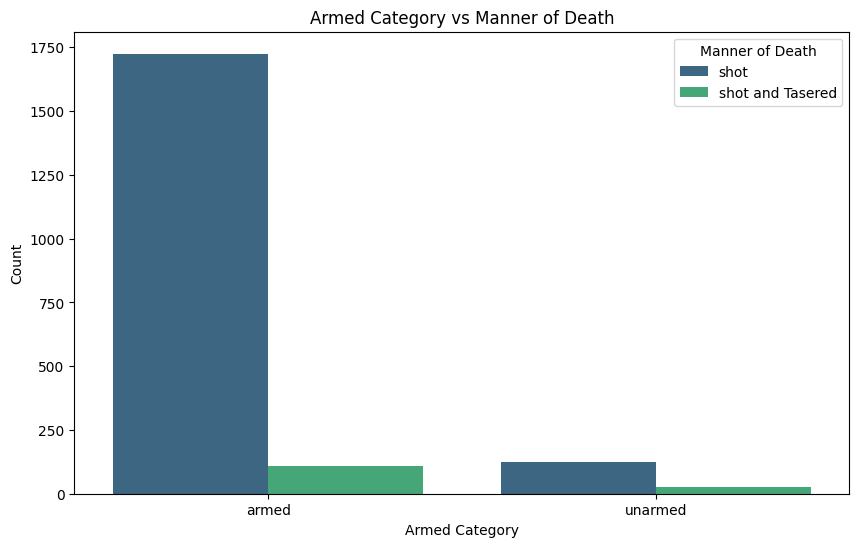

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='armed_category', hue='manner_of_death', data=new_data, palette='viridis')
plt.xlabel('Armed Category')
plt.ylabel('Count')
plt.title('Armed Category vs Manner of Death')
plt.legend(title='Manner of Death')
plt.show()

## 3.3 Descriptive statistics - age

Given our earlier examination of the 'age' column, the following graph doesn't present new insights. It reaffirms the observation that a majority of victims fall within the young to middle-aged bracket. Additionally, there are instances of very young and elderly victims within the dataset. Also, we can see that majority of the vicitms are from early 20s until late 40s.


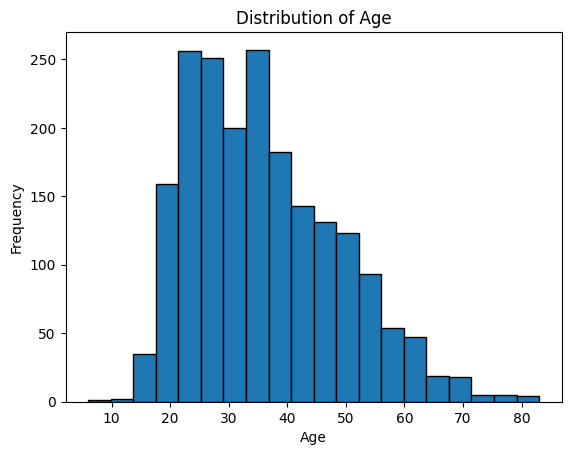

In [38]:
plt.hist(new_data['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

## 3.4 Descriptive statistics - gender

Before examining 'gender' variable we could guess that there will be more men victims rather than womans. 

In [39]:
gender_percentage = new_data['gender'].value_counts(normalize=True) * 100

print("Percentage of each gender:")
print(gender_percentage)

Percentage of each gender:
gender
M    95.768262
F     4.231738
Name: proportion, dtype: float64


Our previous assumption holds true. Nearly 96% of the total portfolio consists of men. This observation might suggest that men could potentially pose a greater threat to the community or potentially exhibit more aggressive behavior.

## 3.5 Descriptive statistics - signs of mental illness

'signs_of_mental_illness' is a boolean-type variable encompassing two outcomes: 'True' and 'False'. True means that victim was showing signs of mentall disorder. It would interesting to see if police officers before shooting mentally ill people tasered them at first.

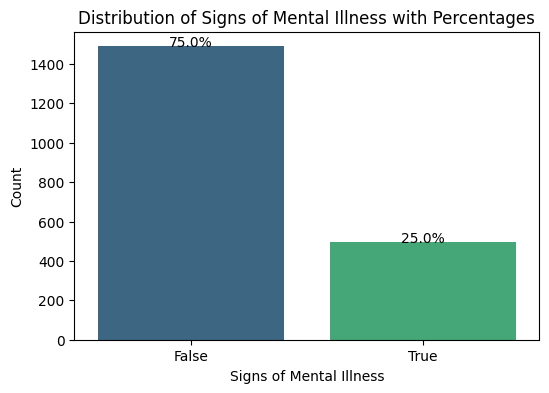

In [40]:
signs_count = new_data['signs_of_mental_illness'].value_counts()
signs_percentage = new_data['signs_of_mental_illness'].value_counts(normalize=True) * 100


plt.figure(figsize=(6, 4))
ax = sns.countplot(x='signs_of_mental_illness', data=new_data, palette='viridis')


for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.3, f"{signs_percentage[i]:.1f}%", ha="center")

plt.xlabel('Signs of Mental Illness')
plt.ylabel('Count')
plt.title('Distribution of Signs of Mental Illness with Percentages')
plt.show()

We can see that 25% of all the victims showed signs of mentall illness. This might suggest that people with mentall condition can exibit unusual behaviour.

<Figure size 1000x600 with 0 Axes>

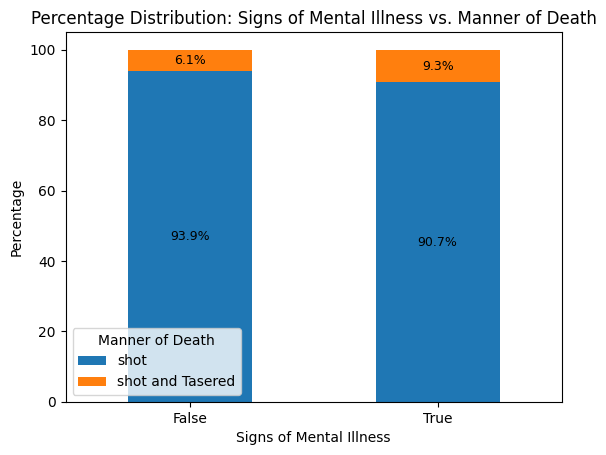

In [41]:
cross_tab = pd.crosstab(data_no_nulls['signs_of_mental_illness'], data_no_nulls['manner_of_death'], normalize='index') * 100


plt.figure(figsize=(10, 6))
ax = cross_tab.plot(kind='bar', stacked=True, rot=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=9)

plt.title('Percentage Distribution: Signs of Mental Illness vs. Manner of Death')
plt.xlabel('Signs of Mental Illness')
plt.ylabel('Percentage')
plt.legend(title='Manner of Death')
plt.show()

Upon examining the percentage distribution of the two variables, it's evident that a slightly higher proportion of victims showing signs of mental illness were also subjected to being tasered. This observation might suggest that the police attempted to warn the individual before resorting to lethal force when they noticed possible mental disorder. 

## 3.6 Descriptive statistics - threat level

The threat level variable consists of three different categories - 'attack', 'other' and 'undetermined'.

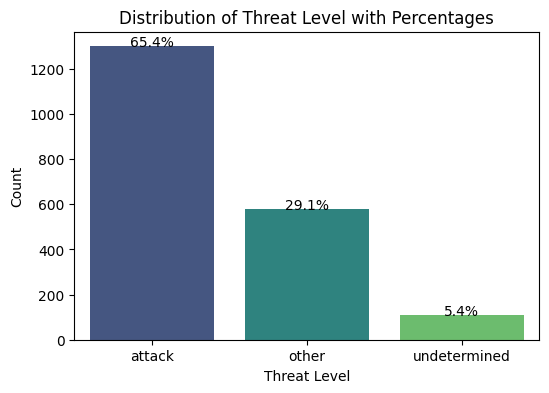

In [42]:
threat_count = new_data['threat_level'].value_counts()
threat_percentage = new_data['threat_level'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='threat_level', data=new_data, palette='viridis')


for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.3, f"{threat_percentage[i]:.1f}%", ha="center")

plt.xlabel('Threat Level')
plt.ylabel('Count')
plt.title('Distribution of Threat Level with Percentages')
plt.show()

Observing the data reveals that approximately 65% of individuals exhibited aggressive behavior and attempted to attack police officers. This observation could potentially explain why a significant number of officers resorted to using solely lethal weapons in their attempts to pacify the situation with these individuals.

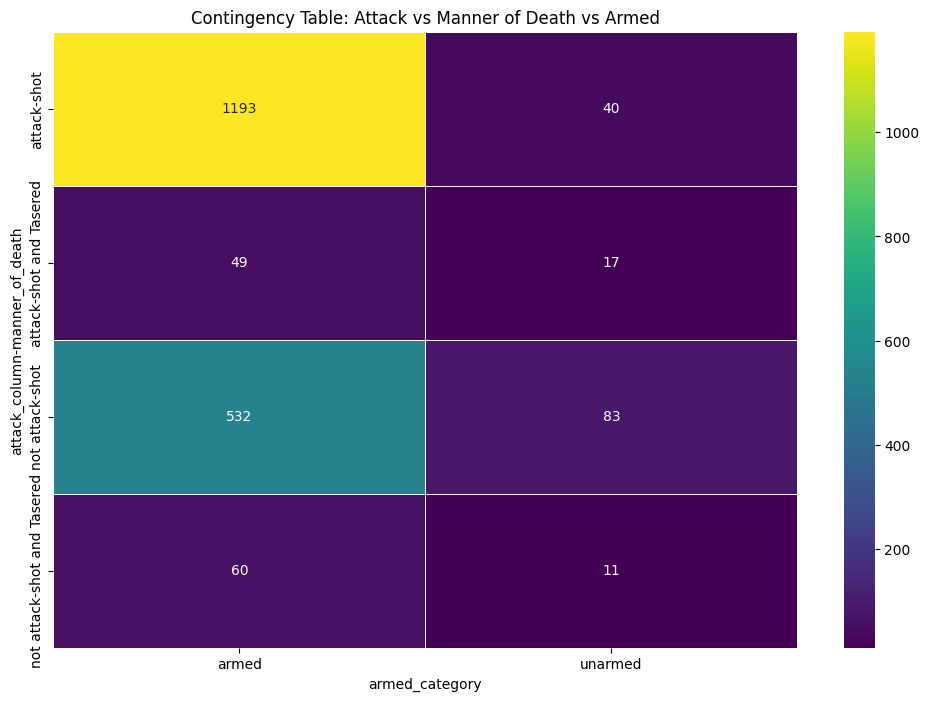

In [51]:
new_data['attack_column'] = new_data['threat_level'].apply(lambda x: 'attack' if x == 'attack' else 'not attack')

contingency_table = pd.crosstab([new_data['attack_column'], new_data['manner_of_death']],
                                new_data['armed_category'], margins=False)

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='viridis', cbar=True, linewidths=.5)
plt.title('Contingency Table: Attack vs Manner of Death vs Armed')
plt.show()


Above we have compared three columns - 'armed','threat_level' and 'manner_of_death. Columns were changed to have only two outcomes for more precise results. We can see an interesting observation that there are more deaths when victims were not attacking and they were unarmed compared to attacking and unarmed victims. This might be related to race, which we will look into in the below sections.

## 3.7 Descriptive statistics - flee

Variable shows if person tried to escape from the police officers and if he tried then how. 

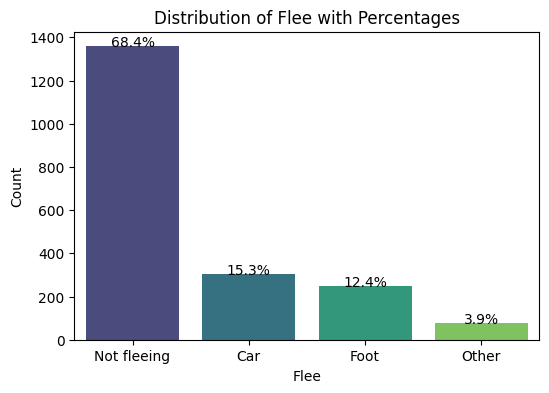

In [52]:
flee_count = new_data['flee'].value_counts()
flee_percentage = new_data['flee'].value_counts(normalize=True) * 100


plt.figure(figsize=(6, 4))
ax = sns.countplot(x='flee', data=new_data, palette='viridis')


for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.3, f"{flee_percentage[i]:.1f}%", ha="center")

plt.xlabel('Flee')
plt.ylabel('Count')
plt.title('Distribution of Flee with Percentages')
plt.show()

The data indicates that a majority of the suspects haven't attempted to flee. This observation raises the possibility that they might have intended to engage in an attack on police officers.

To verify this hypothesis, we'll create a new variable named 'flee_new' categorizing 'Not fleeing' as such and grouping all other variables as 'Fleeing'. Additionally, a new variable 'threat_level_new' will be generated, containing two categories: 'Attack' and grouping all other values as 'Not attack'.

In [53]:
data_no_nulls['flee_new'] = data_no_nulls['flee'].apply(lambda x: 'Not fleeing' if x == 'Not fleeing' else 'Fleeing')

data_no_nulls['threat_level_new'] = data_no_nulls['threat_level'].apply(lambda x: 'Attack' if x == 'attack' else 'Not attack')

print(data_no_nulls['flee_new'].value_counts())
print(data_no_nulls['threat_level_new'].value_counts())

flee_new
Not fleeing    1358
Fleeing         627
Name: count, dtype: int64
threat_level_new
Attack        1299
Not attack     686
Name: count, dtype: int64


<Figure size 800x600 with 0 Axes>

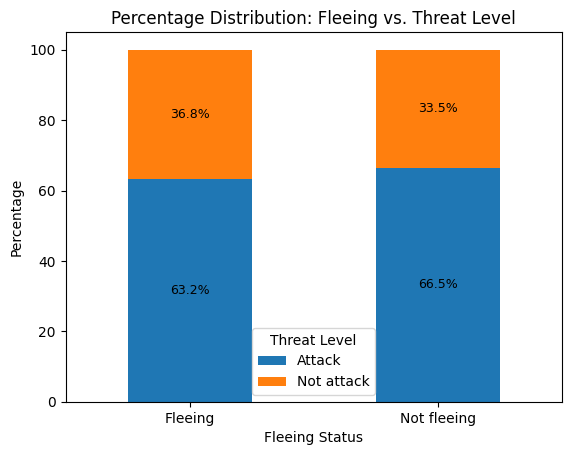

In [54]:
cross_tab = pd.crosstab(data_no_nulls['flee_new'], data_no_nulls['threat_level_new'], normalize='index') * 100


plt.figure(figsize=(8, 6))
ax = cross_tab.plot(kind='bar', stacked=True, rot=0)


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=9)

plt.title('Percentage Distribution: Fleeing vs. Threat Level')
plt.xlabel('Fleeing Status')
plt.ylabel('Percentage')
plt.legend(title='Threat Level')
plt.show()

The table above doesn't indicate any clear tendency for not fleeing individuals to exhibit more attacks compared to those fleeing. Surprisingly, there appears to be almost no discernible difference in attack tendencies between these two groups.

## 3.8 Descriptive statistics - body camera

'body camera' variable shows if police officer had a camera or not during the incident.

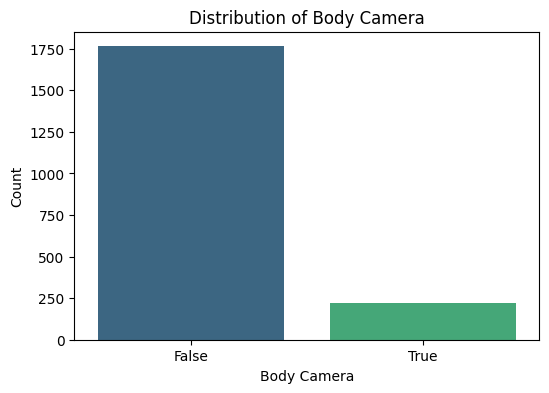

In [55]:
plt.figure(figsize=(6, 4))
sns.countplot(x='body_camera', data=new_data, palette='viridis')
plt.xlabel('Body Camera')
plt.ylabel('Count')
plt.title('Distribution of Body Camera')
plt.show()

It's apparent that the majority of officers did not have their body cameras activated. This circumstance suggests a challenge in evaluating the actions of both the police officer and the suspect. With no direct video evidence, relying solely on the officer's account might introduce bias, especially considering the fatality of the suspect involved. This might suggest why there are so many fatal shootings in the US.

## 3.9 Descriptive statistics - date

Our data consists of daily recors from 2015 Januray until 2017 February.

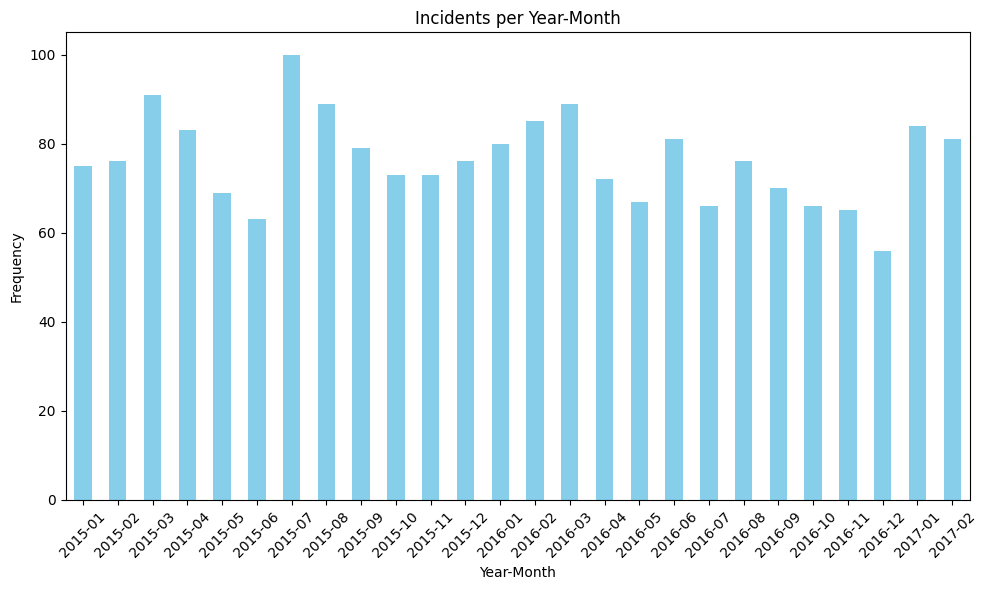

In [56]:
new_data['month'] = new_data['date'].dt.month
new_data['year'] = new_data['date'].dt.year

new_data['month_year'] = new_data['date'].dt.to_period('M')

plt.figure(figsize=(10, 6))
new_data['month_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.title('Incidents per Year-Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph above illustrates the monthly distribution of fatal incidents throughout the observed period. No months stand out with unusually high numbers of fatal shootings, indicating a relatively consistent occurrence of incidents across the months. Therefore, most probably we can't tie shootings with specific events or holidays (or other wide spread event).

## 4. Analysis of Fatal Shootings Across US States

This section dives deeper into various aspects related to different US states.

We'll be working with refined data that excludes duplicates and missing values.

In order to visualize geographical graphs, additional information about US states is required. For this purpose, we've imported an additional dataset named 'uscities' containing longitude and latitude information.

In [57]:
uscities = pd.read_csv('uscities.csv')
uscities.head(5)

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18908608,11226.2,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,11922389,3202.3,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8497759,4648.7,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6080145,4728.2,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Houston,Houston,TX,Texas,48201,Harris,29.7860,-95.3885,5970127,1382.2,shape,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925


From this dataset we are going to join two columns - latitude and longitude.

In [58]:
data_no_nulls.rename(columns={'city': 'city_name'}, inplace=True)

merged_data = pd.merge(data_no_nulls, uscities, how='left', left_on=['state', 'city_name'], right_on=['state_id', 'city'])

lat_lng_state = merged_data[['lat', 'lng']]

data_no_nulls[['lat', 'lng']] = lat_lng_state

In [59]:
data_no_nulls['city_state'] = data_no_nulls['city_name'] + ', ' + data_no_nulls['state']

Additionally, for the creation of interactive geographical graphs, we've imported US state shape information which is available and accessible in the 'us_map' dataset.

In [60]:
us_map = gpd.read_file('States_shapefile.shp')
us_map.head(10)

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,2,None,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
4,5,None,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."
5,6,ECOMAP,CO,COLORADO,F,924,"POLYGON ((-102.04446 37.64147, -102.04201 37.3..."
6,7,SIMS,CT,CONNECTICUT,F,925,"POLYGON ((-73.53039 41.52275, -73.51715 41.665..."
7,8,None,DE,DELAWARE,P,926,"POLYGON ((-75.70707 38.55759, -75.71071 38.649..."
8,9,None,DC,DISTRICT OF COLUMBIA,P,927,"POLYGON ((-77.00793 38.96667, -76.91090 38.890..."
9,10,None,FL,FLORIDA,P,928,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ..."


To generate a geographical chart, using short state names alone is insufficient. Consequently, the current 'state' column does not fulfill our requirements. Hence, we aim to augment this dataset by introducing a new column named 'state_name'.

In [61]:
merged_data = pd.merge(data_no_nulls, us_map, how='left', left_on=['state'], right_on=['State_Code'])

lat_lng = merged_data[['State_Name']]

data_no_nulls[['state_name']] = lat_lng

Observing uppercase letters in certain columns, we anticipate potential issues down the line. To ensure consistency and mitigate possible problems, it's necessary to convert all columns within the 'us_map' dataset to lowercase.

In [62]:
us_map.columns = map(str.lower, us_map.columns)

print(us_map.columns)

Index(['fid', 'program', 'state_code', 'state_name', 'flowing_st', 'fid_1',
       'geometry'],
      dtype='object')


Following the integration of supplementary datasets and necessary adjustments, we're now prepared to visualize the distribution of fatalities across various states.

In [63]:
state_stats = data_no_nulls.groupby('state_name')['age'].agg(['count', 'mean']).reset_index()
state_stats.columns = ['state_name', 'Occurrences', 'Average_Age']

merged_data = pd.merge(us_map, state_stats, on='state_name', how='left')

map = folium.Map(location=[37, -102], zoom_start=4)

colormap = LinearColormap(['green', 'yellow', 'red'], vmin=merged_data['Occurrences'].min(), vmax=merged_data['Occurrences'].max())

for idx, row in merged_data.iterrows():
    state_occurrences = row['Occurrences']
    average_age = row['Average_Age']
    color = colormap(state_occurrences)
    tooltip_text = f"{row['state_name']}<br>Killings: {state_occurrences}<br>Age: {average_age:.1f}"
    folium.GeoJson(
        row['geometry'],
        style_function=lambda x, fill_color=color: {
            'fillColor': fill_color,
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6
        },
        tooltip=tooltip_text
    ).add_to(map)

colormap = LinearColormap(['green', 'yellow', 'red'], vmin=merged_data['Occurrences'].min(), vmax=merged_data['Occurrences'].max())

colormap.add_to(map)

map.add_child(colormap)

map

The interactive geographical plot gives a possibility to explore different US states quite quickly. The graph shows how many people were killed and what was their average age. Colour changed from dark green to red shows which states had higher occurences of shootings. We can see that South states like California, Florida and Texas dominates.

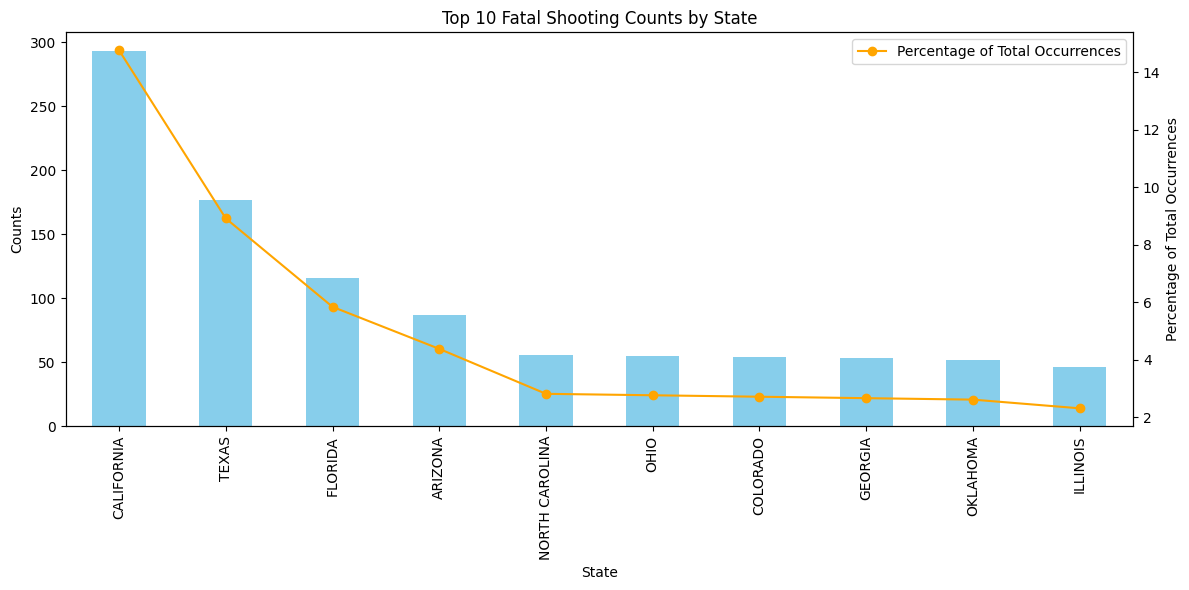

In [64]:
state_counts = data_no_nulls['state_name'].value_counts()

state_percentages = (state_counts / len(data_no_nulls)) * 100

top_10_states = state_counts.head(10)

plt.figure(figsize=(12, 6))
top_10_states.plot(kind='bar', color='skyblue', label='Fatal Shooting Counts')
plt.title('Top 10 Fatal Shooting Counts by State')
plt.xlabel('State')
plt.ylabel('Counts')

ax2 = plt.twinx()
state_percentages[top_10_states.index].plot(ax=ax2, color='orange', marker='o', label='Percentage of Total Occurrences')

plt.ylabel('Percentage of Total Occurrences')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


The preceding plot and table illustrate that California, Texas, and Florida have the highest incidence of fatal shootings. These three states collectively account for nearly 20% of all shootings in the United States.

In [66]:
distinct_cities_per_state = data_no_nulls.groupby('state_name')['city_name'].nunique()
result = distinct_cities_per_state[distinct_cities_per_state > 10].sort_values(ascending=False)
print(result)


state_name
CALIFORNIA        244
TEXAS             150
FLORIDA           104
ARIZONA            83
OHIO               55
NORTH CAROLINA     53
OKLAHOMA           52
GEORGIA            51
COLORADO           48
MISSOURI           44
ILLINOIS           44
WASHINGTON         41
LOUISIANA          39
NEW YORK           38
TENNESSEE          37
ALABAMA            37
NEW MEXICO         36
SOUTH CAROLINA     35
KENTUCKY           33
PENNSYLVANIA       33
INDIANA            32
VIRGINIA           31
MICHIGAN           29
NEVADA             28
WISCONSIN          27
OREGON             27
MARYLAND           27
MINNESOTA          25
NEW JERSEY         22
MASSACHUSETTS      19
UTAH               19
KANSAS             19
WEST VIRGINIA      18
MISSISSIPPI        16
ARKANSAS           16
IDAHO              13
NEBRASKA           13
Name: city_name, dtype: int64


The data also reveals an interesting trend where states with the highest number of fatalities correspond to those with a larger number of unique cities where shootings occurred. Surprisingly, on average, no state exhibits more than 1.2 fatalities per city within its borders. This statistic sheds a light on the distribution of fatal incidents across various cities within each state. This would suggest that on average there are not a lot of cities that stand out in the matter of killed citizens during a fatal shooting.

In [67]:
occurrences_per_state = data_no_nulls['state_name'].value_counts()

distinct_cities_per_state = data_no_nulls.groupby('state_name')['city_name'].nunique()

average_occurrences_per_city_per_state = occurrences_per_state / distinct_cities_per_state

sorted_average = average_occurrences_per_city_per_state.sort_values(ascending=False)

print(sorted_average)


state_name
CALIFORNIA              1.200820
TEXAS                   1.180000
COLORADO                1.125000
FLORIDA                 1.115385
VIRGINIA                1.096774
MARYLAND                1.074074
NORTH CAROLINA          1.056604
WEST VIRGINIA           1.055556
TENNESSEE               1.054054
UTAH                    1.052632
MASSACHUSETTS           1.052632
ARIZONA                 1.048193
ILLINOIS                1.045455
GEORGIA                 1.039216
OREGON                  1.037037
WISCONSIN               1.037037
MICHIGAN                1.034483
INDIANA                 1.031250
NEW MEXICO              1.027778
ALABAMA                 1.027027
LOUISIANA               1.025641
WASHINGTON              1.024390
MISSOURI                1.022727
MINNESOTA               1.000000
MISSISSIPPI             1.000000
ARKANSAS                1.000000
CONNECTICUT             1.000000
DELAWARE                1.000000
DISTRICT OF COLUMBIA    1.000000
VERMONT                 1.000000

## 5. Race in fatal shootings data

In the United States, there is a prevailing belief that individuals of Black ethnicity are disproportionately affected compared to other racial groups when it comes to police fatal shootings. This segment aims to investigate whether the patterns exist, indicating a higher frequency of Black individuals becoming victims in such incidents.

'Race' column consists of 6 different categories:
1. W - white person.
2. B - black person.
3. H - hispanic person.
4. A - asian person.
5. O - other race.
6. N - natvie american person.

Let's see how races are distributed.

In [68]:
race_counts = data_no_nulls['race'].value_counts()

print(race_counts)

race
W    1022
B     522
H     355
A      32
O      28
N      26
Name: count, dtype: int64


After a preliminary analysis of the 'race' variable, it is evident that the number of shot individuals belonging to the white race is approximately twice as high as the number of those from the black race. Other races have even lower amounts of shot citizens.

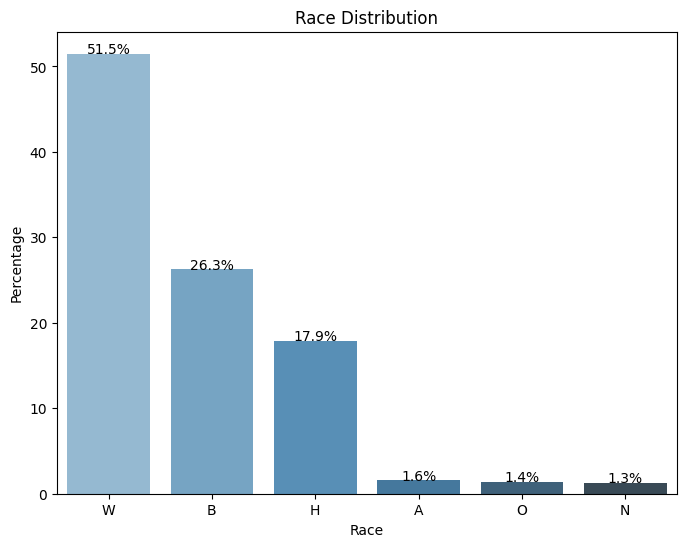

In [69]:
plt.figure(figsize=(8, 6))
race_counts = data_no_nulls['race'].value_counts(normalize=True).reset_index()
race_counts.columns = ['Race', 'Percentage']
race_counts['Percentage'] *= 100  

bar_plot = sns.barplot(x='Race', y='Percentage', data=race_counts, palette='Blues_d')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Percentage')

for index, row in race_counts.iterrows():
    bar_plot.text(index, row['Percentage'], f'{row["Percentage"]:.1f}%', color='black', ha="center")

plt.show()

Upon examining the barplot, it is apparent that 51.5% of the victims are of the white race, followed by black individuals at 26.3%, and Hispanics representing 17.9% of unfortunate cases. Initially, it seems that black people are disproportionately affected by police shootings, but white individuals face an even higher unfortunate incidence.

However, considering the vast size of the US population, where the majority comprises white people, we need to contextualize these proportions. In the following sections, we will gather information about the total US population and break it down by race. We aim to project the number of fatal shooting deaths for each race per 1 million people and for the entire population.

Note: The 'O - other' race will be excluded from the analysis due to insufficient information about the specific races falling under this category.

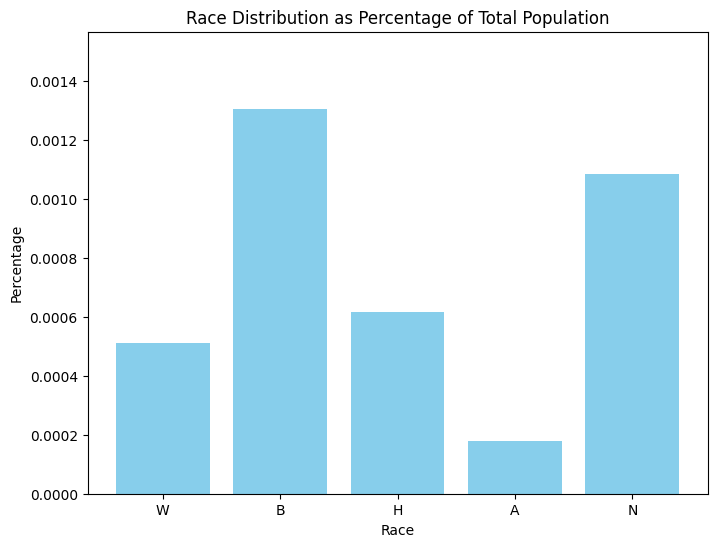

In [70]:

race_counts = data_no_nulls['race'].value_counts()

total_population_W = 200000000
total_population_B = 40000000
total_population_H = 57500000
total_population_A = 18000000
total_population_N = 2400000

percentage_W = (race_counts['W'] / total_population_W) * 100
percentage_B = (race_counts['B'] / total_population_B) * 100
percentage_H = (race_counts['H'] / total_population_H) * 100
percentage_A = (race_counts['A'] / total_population_A) * 100
percentage_N = (race_counts['N'] / total_population_N) * 100

race_percentages = pd.DataFrame({
    'Race': ['W', 'B', 'H', 'A', 'N'],
    'Percentage': [percentage_W, percentage_B, percentage_H, percentage_A, percentage_N]
})

plt.figure(figsize=(8, 6))
plt.bar(race_percentages['Race'], race_percentages['Percentage'], color='skyblue')
plt.title('Race Distribution as Percentage of Total Population')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.ylim(0, max(race_percentages['Percentage']) * 1.2)  
plt.show()

To initiate our projections, we must first determine the percentage of each race in the total respective population that has fallen victim to fatal police shootings. Upon examining the population at the racial level, it becomes evident that black (B) and Native American (N) individuals have the highest percentage of their respective populations affected by such incidents. Now, let's explore the methodology for projecting shootings per 1 million people and for the entire US population.

In [71]:
race_counts = data_no_nulls['race'].value_counts()


total_population_W = 200000000
total_population_B = 40000000
total_population_H = 57500000
total_population_A = 18000000
total_population_N = 2400000

total_population = 323000000


NumberOfKillings_W = (race_counts['W'] / total_population_W) * 1000000
NumberOfKillings_B = (race_counts['B'] / total_population_B) * 1000000
NumberOfKillings_H = (race_counts['H'] / total_population_H) * 1000000
NumberOfKillings_A = (race_counts['A'] / total_population_A) * 1000000
NumberOfKillings_N = (race_counts['N'] / total_population_N) * 1000000


NumberOfKillings_W = int(round(NumberOfKillings_W))
NumberOfKillings_B = int(round(NumberOfKillings_B))
NumberOfKillings_H = int(round(NumberOfKillings_H))
NumberOfKillings_A = int(round(NumberOfKillings_A))
NumberOfKillings_N = int(round(NumberOfKillings_N))


NumberOfKillings_TotalPopulation_W = (race_counts['W'] / total_population_W) * total_population
NumberOfKillings_TotalPopulation_B = (race_counts['B'] / total_population_B) * total_population
NumberOfKillings_TotalPopulation_H = (race_counts['H'] / total_population_H) * total_population
NumberOfKillings_TotalPopulation_A = (race_counts['A'] / total_population_A) * total_population
NumberOfKillings_TotalPopulation_N = (race_counts['N'] / total_population_N) * total_population


NumberOfKillings_TotalPopulation_W = int(round(NumberOfKillings_TotalPopulation_W))
NumberOfKillings_TotalPopulation_B = int(round(NumberOfKillings_TotalPopulation_B))
NumberOfKillings_TotalPopulation_H = int(round(NumberOfKillings_TotalPopulation_H))
NumberOfKillings_TotalPopulation_A = int(round(NumberOfKillings_TotalPopulation_A))
NumberOfKillings_TotalPopulation_N = int(round(NumberOfKillings_TotalPopulation_N))


race_killings = pd.DataFrame({
    'Race': ['W', 'B', 'H', 'A', 'N'],
    'Killings per Million': [NumberOfKillings_W, NumberOfKillings_B, NumberOfKillings_H, NumberOfKillings_A, NumberOfKillings_N],
    'Killings per Total US population': [NumberOfKillings_TotalPopulation_W, NumberOfKillings_TotalPopulation_B, NumberOfKillings_TotalPopulation_H
                                         , NumberOfKillings_TotalPopulation_A, NumberOfKillings_TotalPopulation_N]
})


print(race_killings)

  Race  Killings per Million  Killings per Total US population
0    W                     5                              1651
1    B                    13                              4215
2    H                     6                              1994
3    A                     2                               574
4    N                    11                              3499


If the total population of each race were equivalent to the overall US population, the projection indicates that over the span of two years, 4215 black individuals would have lost their lives in fatal police shootings. In contrast, Asians have the lowest projected deaths, totaling 574. Notably, this projection suggests that the number of black citizens as victims would be more than twice that of white individuals.

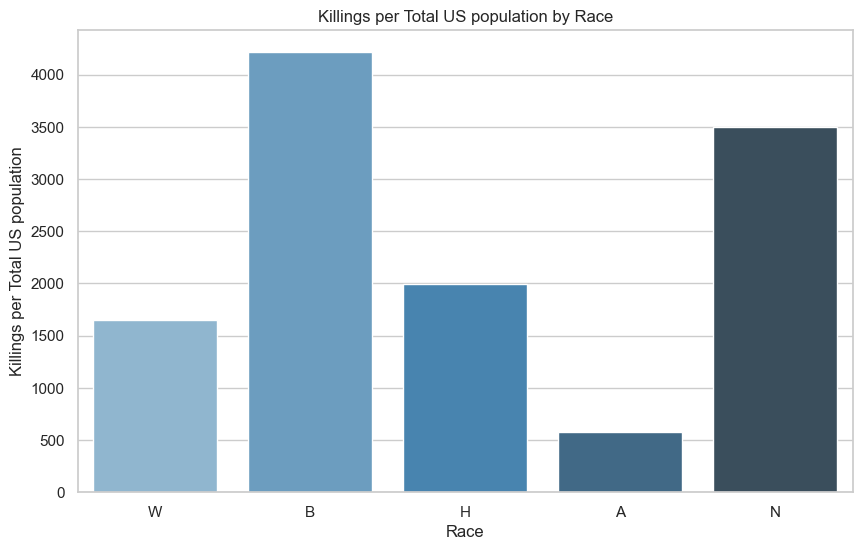

In [72]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(data=race_killings,  x='Race', y='Killings per Total US population', palette='Blues_d')
plt.xlabel('Race')
plt.ylabel('Killings per Total US population')
plt.title('Killings per Total US population by Race')
plt.show()

Observing the graph, it is clear that Black citizens are experiencing a significantly higher rate of fatal incidents than any other race in the US. The death rate is almost three times higher compared to white citizens. Additionally, Native Americans are also frequently victims of fatal shootings. While not surprising, given media coverage, which often highlights the unfortunate reality that black individuals more frequently fall victim to police shootings. In the next section, we will delve into exploring possible explanations for this disproportionate use of force.

### 5.1 Race and Age

In this section, we will examine the interplay between race and age variables. While we have established that black individuals are frequently victims of police shootings, it is intriguing to explore whether there is any discernible relationship with age.

In [73]:
average_age_by_race = data_no_nulls.groupby('race')['age'].mean().reset_index()

print("Average Age by Race:")
print(average_age_by_race)

Average Age by Race:
  race        age
0    A  37.562500
1    B  31.538314
2    H  32.929577
3    N  31.576923
4    O  33.071429
5    W  39.718200


Upon examination, it is apparent that all victims fall within their 30s. Notably, the average age for white individuals is the highest, while it is comparatively lower for Black and Native American individuals. The Asian, Hispanic, and Black populations exhibit closely grouped average ages.

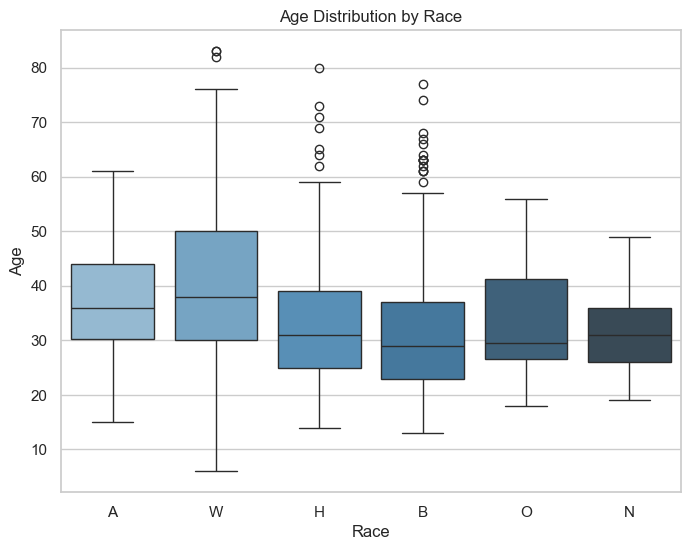

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='race', y='age', data=data_no_nulls, palette='Blues_d')
plt.title('Age Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Age')
plt.show()

The boxplot reaffirms the observed trend. It is evident that the age range for white citizens spans from the minimum to the maximum value. Interestingly, the Native American population displays the least amount of age range, with individuals killed by police ranging from late teens to late 40s.

A comparison with the age variable has provided insights, revealing that the race more frequently affected by fatal incidents tends to be, on average, slightly younger compared to other races, such as white individuals.

### 5.2 Race and armed

The age variable has not provided substantial insights into the reasons why Black individuals are more frequently victims of fatal incidents. Nevertheless, let's explore whether the individuals killed were unarmed. This examination aims to determine if fatal force was employed not due to an imminent threat but potentially as a result of social issues such as racism.

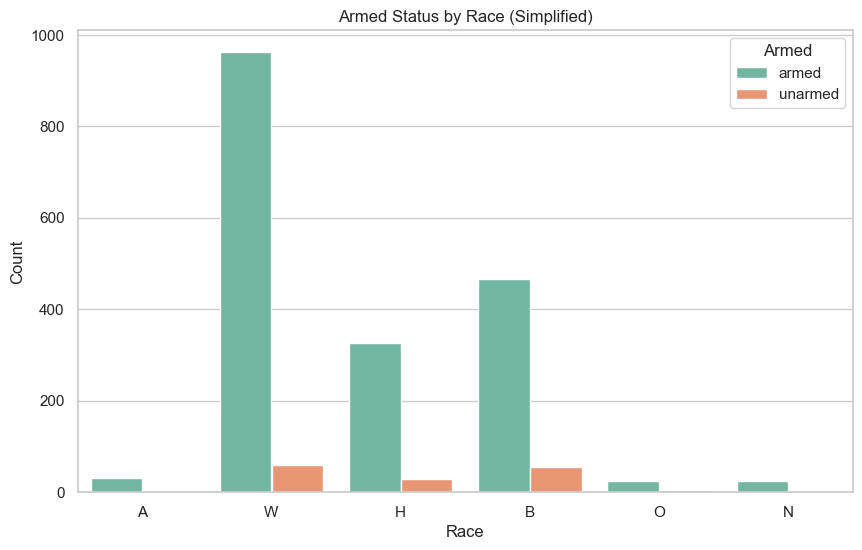

In [75]:
data_no_nulls['armed_category'] = data_no_nulls['armed'].apply(lambda x: 'unarmed' if x == 'unarmed' else 'armed')

plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='armed_category', data=data_no_nulls, palette='Set2')
plt.title('Armed Status by Race (Simplified)')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Armed', loc='upper right')
plt.show()

An intriguing discovery emerges. The data reveals that the number of unarmed black individuals killed is comparable to that of white individuals. However, considering there are two times more total deaths among white people, it raises the possibility that police tend to shoot and fatally injure black individuals, even when they are unarmed.

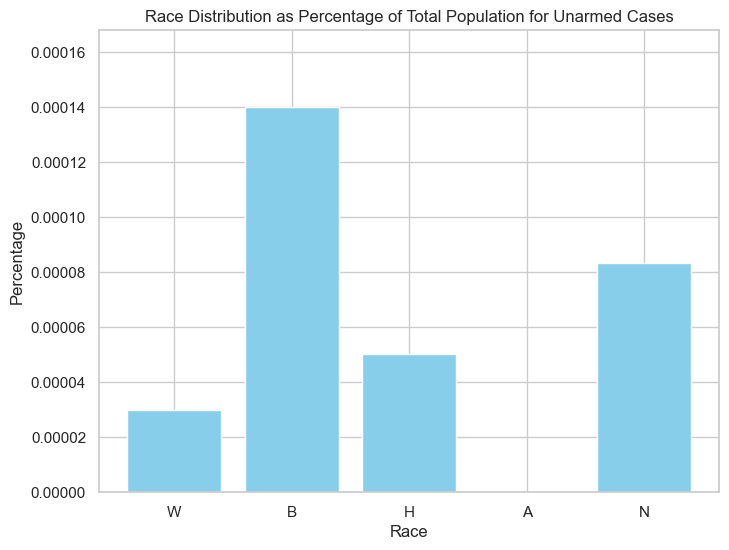

In [77]:
armed_category_counts = data_no_nulls[data_no_nulls['armed_category'] == 'unarmed']['race'].value_counts()

total_population_W = 200000000
total_population_B = 40000000
total_population_H = 57500000
total_population_A = 18000000
total_population_N = 2400000

percentage_W = percentage_B = percentage_H = percentage_A = percentage_N = 0


if 'W' in armed_category_counts.index:
    percentage_W = (armed_category_counts['W'] / total_population_W) * 100

if 'B' in armed_category_counts.index:
    percentage_B = (armed_category_counts['B'] / total_population_B) * 100

if 'H' in armed_category_counts.index:
    percentage_H = (armed_category_counts['H'] / total_population_H) * 100

if 'A' in armed_category_counts.index:
    percentage_A = (armed_category_counts['A'] / total_population_A) * 100

if 'N' in armed_category_counts.index:
    percentage_N = (armed_category_counts['N'] / total_population_N) * 100

armed_category_percentages = pd.DataFrame({
    'Race': ['W', 'B', 'H', 'A', 'N'],
    'Percentage': [percentage_W, percentage_B, percentage_H, percentage_A, percentage_N]
})

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(armed_category_percentages['Race'], armed_category_percentages['Percentage'], color='skyblue')
plt.title('Race Distribution as Percentage of Total Population for Unarmed Cases')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.ylim(0, max(armed_category_percentages['Percentage']) * 1.2)  
plt.show()


In the table above, the percentage of individuals killed when unarmed is provided for each population. The accompanying graph enhances the visibility of this pattern. Unarmed black citizens are shot at a rate seven times higher than unarmed white individuals, when compared to the respective total population for each race. Additionally, there is a notable number of unarmed Native Americans among the victims. Conversely, the Asian population exhibits a low count of unarmed victims, with only two recorded instances.

# Conclusions and suggestions for improvements

After diving deeper to fatal shootings data in US we can have the following conclusions about the data:

1. A significant majority of recorded deaths resulted from shooting incidents, while a smaller proportion involved the use of tasers. This suggests a predominant reliance on lethal force over attempts to apprehend suspects using less lethal means
2. A significant majority of victims were armed, potentially shedding light on the use of lethal force by law enforcement in situations where suspects were perceived as armed.
3. The majority of victims fall within the young to middle-aged bracket. There are instances of very young and elderly victims within the dataset.
4. Nearly 96% of the total portfolio consists of men. This observation might suggest that men could potentially tend to commit more crimes.
5. About 65% of individuals exhibited aggressive behavior and attempted to attack police officers. This observation could potentially explain why a significant number of officers resorted to using solely lethal weapons.
6. A majority of the suspects haven't attempted to flee, raising the possibility that they might have intended to engage in an attack on police officers.
7. The majority of officers did not have their body cameras activated, which may introduce bias when evaluating the actions of both the police officer and the suspect.
8. Fatal incidents occurred relatively consistently across the months without any standout patterns.
9. California, Texas, and Florida have the highest incidence of fatal shootings. These three states collectively account for nearly 20% of all shootings in the United States. However, these states are one of the biggest in regards to total population.
10. Black citizens experience a significantly higher rate of fatal incidents than any other race in the US, with an almost three times higher death rate compared to white citizens.
11. The number of unarmed black individuals killed is comparable to that of white individuals, suggesting a disproportionate use of force against black individuals, even when they are unarmed.

The conclusions drawn from the analysis highlight two primary issues in the US – racism and the excessive use of force. There is a concerning trend of police officers shooting unarmed US citizens. The data reveals a notable shortage of officers equipped with body cameras. To address this, a key recommendation is to increase the deployment of cameras for police officers across the US. It would be valuable to investigate whether the incidence of fatal shootings decreases with the presence of video evidence. Enhancing the prevalence of body cameras has the potential to bring about positive changes in promoting accountability and transparency within law enforcement.


Suggestions how this analysis can be improved:
1. Adapt machine learning models.
2. Add additional data like socio-economic status, education level, and employment status. This could provide a more comprehensive understanding of the factors influencing fatal shootings. Also, more information about police officer can be analysed (like race, police department).
3. Explore external factors such as community policing initiatives, gun control policies, or public sentiments towards law enforcement. Understanding these external dynamics could provide a broader context.
4. It would be interesting to analyse newer data with expectation that more police officers have body cameras.




## Appendix

Information about 'race' population in US was taken from - https://usafacts.org/data/topics/people-society/population-and-demographics/population-data/population/.
Information about longitude and altitude information was taken from - https://simplemaps.com/data/us-cities.
Shape of the US map was taken from - https://hub.arcgis.com/datasets/1b02c87f62d24508970dc1a6df80c98e/explore?location=31.392059%2C-106.491703%2C4.00.